In [87]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [88]:
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [3,6,9,12,15,18]]).T
datos.columns = ["x1", "x2"]

In [89]:
datos

,x1,x2
0,2,3
1,4,6
2,6,9
3,8,12
4,10,15
5,12,18


<Axes: xlabel='x1', ylabel='x2'>

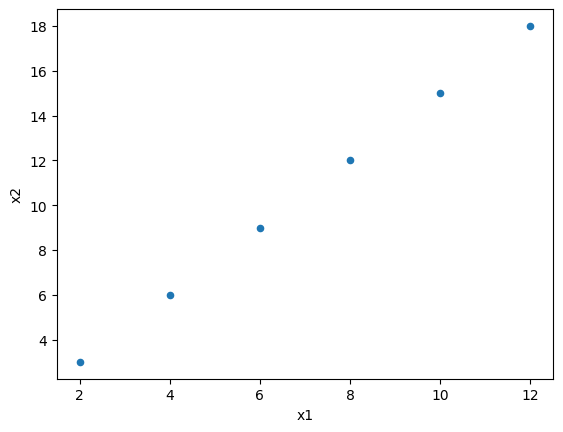

In [90]:
datos.plot.scatter("x1", y="x2")

In [91]:
[1,2,3,4,5,6] 
[2,3]

[2, 3]

In [92]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [93]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [94]:
pca.explained_variance_ratio_

array([1.])

In [95]:
pd.DataFrame(
    data    = pca.components_,
    columns = datos.columns,
    index   = ['PC1']
)

,x1,x2
PC1,-0.707107,-0.707107


In [96]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

,PC1
0,2.070197
1,1.242118
2,0.414039
3,-0.414039
4,-1.242118
5,-2.070197


In [97]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

,0,1
0,-1.46385,-1.46385
1,-0.87831,-0.87831
2,-0.29277,-0.29277
3,0.29277,0.29277
4,0.87831,0.87831
5,1.46385,1.46385


In [98]:
std.inverse_transform(reconstruccion)

array([[ 2.,  3.],
       [ 4.,  6.],
       [ 6.,  9.],
       [ 8., 12.],
       [10., 15.],
       [12., 18.]])

In [99]:
# Repetir
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [3*1.01,6*1.02,9*1.03,12*1.04,15*1.05,18*1.06]]).T
datos.columns = ["x1", "x2"]

In [100]:
datos

,x1,x2
0,2.0,3.03
1,4.0,6.12
2,6.0,9.27
3,8.0,12.48
4,10.0,15.75
5,12.0,19.08


In [101]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [102]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [103]:
pca.explained_variance_ratio_

array([0.99995342])

In [104]:
pd.DataFrame(
    data    = pca.components_,
    columns = datos.columns,
    index   = ['PC1']
)

,x1,x2
PC1,0.707107,0.707107


In [105]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

,PC1
0,-2.057203
1,-1.244640
2,-0.424338
3,0.403702
4,1.239481
5,2.082997


In [106]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

,0,1
0,-1.454662,-1.454662
1,-0.880093,-0.880093
2,-0.300052,-0.300052
3,0.285461,0.285461
4,0.876445,0.876445
5,1.472902,1.472902


In [107]:
std.inverse_transform(reconstruccion)

array([[ 2.03138263,  2.97962619],
       [ 3.99390978,  6.12977571],
       [ 5.97512678,  9.30992524],
       [ 7.97503363, 12.52007476],
       [ 9.99363032, 15.76022429],
       [12.03091686, 19.03037381]])